<a href="https://colab.research.google.com/github/alfredwilson/TFM/blob/master/Detection_Classification_WCZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistema Detección - Clasificación de leucocitos.
Ejecuta las celdas necesarias para cargar todos los modelos, librerías y funciones:

1.   Conectarse al Google - Drive
2.   Importar Tensorflow y Ver la versión. Desde Google colab funciona con "Entorno de ejecucion None" y con tensorflow=1.15.0
3.   Cargar el modelo Clasificación de lecucocitos
4.   Ejecutar la función imrecortada()
5.   Instalar la libreria ImageAI
6.   Cargar el modelo Detección Células normales sangre
7.   Proceder con los pasos para ejecutar los modelos 


In [2]:
#1)Conectarse al Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
#2. Importar tensorflow y ver la versión
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
#3. Cargar el modelo Clasificación de leucocitos

#se carga el archivo del modelo Clasificador Lecucocitos de la ruta :'/content/drive/My Drive/Colab Notebooks/saved_model.pb'
new_model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/')


In [0]:
#4. Ejecutar la función imrecortada()

#Funcion que ajusta la imagen recortada dadas las coordenadas 
#xmin,ymin,xmax,ymax, a un tamaño de 320x240
#Programada por Wilson Castro Z.
def imrecortada(xmin,ymin,xmax,ymax,width,height):
  ancho=xmax-xmin
  alto=ymin-ymax
  while(ancho<320):
    if(xmin-1>=0):
      xmin=xmin-1
    xmaximo=width-xmin
    if(xmax+1<=xmaximo):
      xmax=xmax+1
    ancho=xmax-xmin
  while(alto<240):
    if(ymin-1>=0):
      ymin=ymin-1
    ymaximo=height-ymin
    if(ymax+1<ymaximo):
       ymax=ymax+1
    alto=ymax-ymin
  return xmin,ymin,xmax,ymax


In [6]:
#5. Instalar la libreria imageAI
!pip3 install imageai --upgrade

     |████████████████████████████████| 184kB 2.6MB/s 


In [0]:
#5. Cargar el modelo Detección de células entrenado
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/My Drive/Colab Notebooks/Blood-Cell-Count-Dataset/models/detection_model-ex-030--loss-0017.155.h5") 
detector.setJsonPath("/content/drive/My Drive/Colab Notebooks/Blood-Cell-Count-Dataset/json/detection_config.json")
detector.loadModel()

##Ejecutar Sistema
Ya cargados todos los modelos, librerías y funciones, proceder con el sistema Detección - Clasificación de leucocitos.

1.   Ingrese la ruta de la imagen de Entrada al sistema
2.   Ingrese la ruta de la imagen a Guardar
3.   Despues puede Ejecutar Celdas siguientes con Ctrl+F10



In [0]:
#Ingresar l ruta de la imagen para realizar el proceso de Deteccion - Clasificación de leucocitos
input_image2="/content/drive/My Drive/Colab Notebooks/Blood-Cell-Count-Dataset/Testing/Images/BloodImage_00369.jpg"
#Guardar la imagen que se genere del Detector:
output_image_paths2="/content/drive/My Drive/Colab Notebooks/Blood-Cell-Count-Dataset/image369_detected.jpg" 

In [9]:
#Ejecutar el modelo entrenado para la imagen cargada

detections = detector.detectObjectsFromImage(input_image=input_image2, 
                                             output_image_path=output_image_paths2)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

RBC  :  81.73084855079651  :  [3, 169, 105, 268]
RBC  :  90.40203094482422  :  [156, 148, 269, 241]
WBC  :  99.47817921638489  :  [316, 103, 529, 302]
RBC  :  97.81392216682434  :  [10, 254, 129, 347]
RBC  :  94.75826621055603  :  [503, 251, 617, 346]
RBC  :  89.04134631156921  :  [11, 338, 123, 446]
RBC  :  96.3194727897644  :  [403, 381, 523, 474]
RBC  :  56.89532160758972  :  [170, 1, 300, 61]
RBC  :  91.68394207954407  :  [64, 0, 163, 87]
RBC  :  70.51522731781006  :  [300, 0, 405, 80]
RBC  :  96.03124856948853  :  [397, 41, 496, 115]
RBC  :  88.26688528060913  :  [493, 20, 597, 153]
RBC  :  86.44750714302063  :  [107, 56, 219, 136]
RBC  :  89.21979665756226  :  [0, 83, 95, 170]
RBC  :  54.34146523475647  :  [62, 90, 173, 186]
RBC  :  87.9827082157135  :  [236, 114, 345, 225]
RBC  :  96.88938856124878  :  [272, 277, 372, 414]
RBC  :  96.46101593971252  :  [393, 301, 485, 377]
RBC  :  89.47807550430298  :  [131, 310, 226, 421]
RBC  :  98.81935715675354  :  [241, 409, 338, 482]
Plate

En la siguinte sección se toman las coordenadas de un bounding box que contenga un leucocito o WBC, y se recorta la imagen para luego identificar el tipo de leucocito con el CLASIFICADOR.

In [10]:
#custom = detections.CustomObjects(WBC=True, dog=True)
for detection in detections:
    if(detection["name"]=="WBC"):
      bbox=detection["box_points"]
      #print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
      #print(bbox)
      left = bbox[0]
      top = bbox[1]
      right = bbox[2]
      bottom = bbox[3]
      print('[',left,',',top,',',right,',',bottom,']')

[ 316 , 103 , 529 , 302 ]


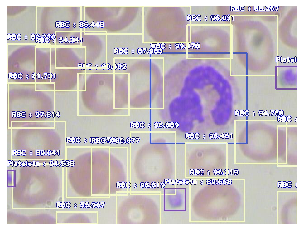

width: 640 height:  480


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Importing Image class from PIL module 
from PIL import Image 
  
# Opens a image in RGB mode 
#im = Image.open(r"/content/drive/My Drive/Colab Notebooks/Blood-Cell-Count-Dataset/image349_detected.jpg") 
im = Image.open(output_image_paths2) 
#output_image_paths2
# Shows the image in image viewer 
plt.imshow(im)
plt.axis('Off')
plt.show()  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size
print('width:', width,'height: ',height)

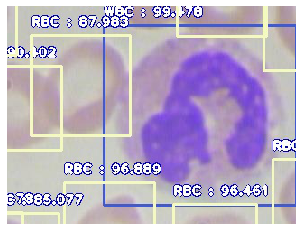

In [12]:
#Code 1 (Continuacion)

width=640
height=480
#left = 208
#top = 179
#right = 419
#bottom = 391
#Funcion que ajusta el area de la imagen recortada a aprox 320*240
left,top,right,bottom=imrecortada(left,top,right,bottom,width,height)

 
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image
plt.imshow(im1)
plt.axis('Off')
plt.show()
#plt.savefig('/content/drive/My Drive/Colab Notebooks/im1.png')

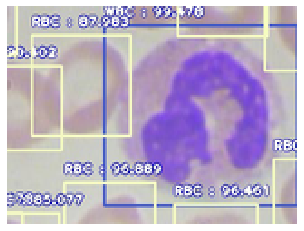

In [13]:
#Reducir la imagen a 120x160 (la mitad para correrla al clasificador)
# Downsize the image with an ANTIALIAS filter (gives the highest quality)
im1 = im1.resize((160,120),Image.ANTIALIAS)
#Show the new image
plt.imshow(im1)
plt.axis('Off')
plt.show()


EJECUTAR EL CLASIFICADOR

In [16]:
#Cargar la imagen recortada para clasificarla segun: 
# - eosinophil: [1.0.0.0.]
# - lymphocyte: [0.1.0.0.]
# - monocyte:   [0.0.1.0.]
# - neutrophil: [0.0.0.1.]
import numpy as np
from google.colab import files
from keras.preprocessing import image

x = image.img_to_array(im1)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = new_model.predict(images, batch_size=10)

print(classes)
x=new_model.predict_classes(images, batch_size=10)
print(x)
if(x==3):
  print('neutrophil')
elif(x==2):
  print('monocyte')
elif(x==1):
  print('lymphocite')
else:
  print('eosinophil')

[[0. 0. 0. 1.]]
[3]
neutrophil
